In [7]:
import numpy as np
from matplotlib import pyplot as plt
from dataset.FastPatchExtractor import FastPatchDataset, FastPatchExtractor
import matplotlib.patches as patches
import torch

In [53]:
position = (80,100)
patch_size = 11

In [1]:
def plot_image(path, img0, selected_patch=(100, 100), p_size=30):
    image0 = img0.to('cpu')
  #  image1 = img1.to('cpu')
    out_dim = (p_size, p_size)
    patch_extractor = FastPatchExtractor(p_dim=p_size, pad=True)
    c, x, y = image0.size()
    p_x, p_y = selected_patch
    p_pos = p_y*x + p_x
    p_image0 = torch.reshape(patch_extractor.extract(image0.unsqueeze(0))[p_pos], out_dim)
    fig, axes = plt.subplots(2, 1, figsize=(3,4))
    rect1 = patches.Rectangle((p_x, p_y), p_size, p_size, linewidth=1, edgecolor='r',facecolor='none')
    axes[0].imshow(image0.squeeze(), cmap='gray')
    axes[0].add_patch(rect1)
    axes[0].axis('off')
    axes[1].imshow(p_image0.squeeze(), cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()
    fig.show()
    fig.savefig(path)

In [2]:
file = "./data/set12/01.png"
ground_truth_image = FastPatchDataset.load_image(file)
plot_image('images/noise_exp/gt.png', ground_truth_image.to(torch.float32), position, patch_size)

NameError: name 'FastPatchDataset' is not defined

In [58]:
c, gt_width, gt_height = ground_truth_image.shape
error_dim = gt_width * gt_height

In [59]:
mu = 0

torch.Size([1, 256, 256])


/tmp/ipykernel_9440/414492940.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


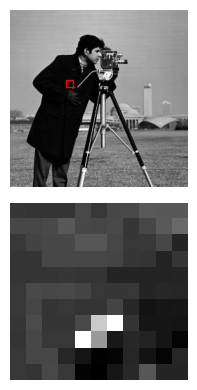

In [67]:
sigma = 0.1
noise_vector_std1 = torch.reshape(torch.from_numpy(np.random.normal(mu, sigma, error_dim)), (1, gt_width, gt_height))
noise_image_std1 = ground_truth_image + noise_vector_std1
print(noise_image_std1.shape)
plot_image('images/noise_exp/noise_std01.png', noise_image_std1, position, patch_size)

torch.Size([1, 256, 256])


/tmp/ipykernel_9440/414492940.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


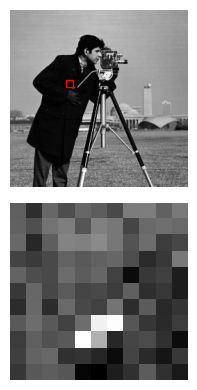

In [68]:
sigma = 1
noise_vector_std1 = torch.reshape(torch.from_numpy(np.random.normal(mu, sigma, error_dim)), (1, gt_width, gt_height))
noise_image_std1 = ground_truth_image + noise_vector_std1
print(noise_image_std1.shape)
plot_image('images/noise_exp/noise_std1.png', noise_image_std1, position, patch_size)

torch.Size([1, 256, 256])


/tmp/ipykernel_9440/414492940.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


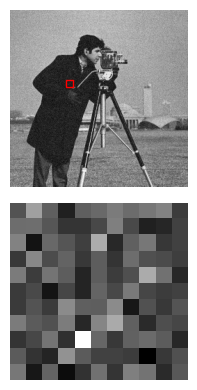

In [69]:
sigma = 10
noise_vector_std1 = torch.reshape(torch.from_numpy(np.random.normal(mu, sigma, error_dim)), (1, gt_width, gt_height))
noise_image_std1 = ground_truth_image + noise_vector_std1
print(noise_image_std1.shape)
plot_image(f'images/noise_exp/noise_std{sigma}.png', noise_image_std1, position, patch_size)